# Analyse complète du dataset ESG - Entreprises cotées
 Ce notebook présente une analyse exhaustive d'un dataset contenant des informations
 financières et ESG (Environnementales, Sociales, Gouvernance) d'entreprises cotées.
#### Analyse ESG Dataset

In [ ]:
#Importation des bibliothèques nécéssaires

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [199]:
# Importation du dataset

In [201]:
data = pd.read_csv("Industrials-sector-ESG-and-stock-market-data.csv")
data.head()

,Unique_id,Symbol,Company_name,Exchange,gicSector,gicSubindustry,Company_ESG_pulse,ESG_beta,SNP,Sustainalytics,...,52w_change price,52w_change price percent,52w_average volume,Name,Sector,Industry,isin,cusip,Securities_type,Currency_code
0,190179,MMM,3M Company,New York Stock Exchange,Industrials,Industrial Conglomerates,-0.083992,0.010832,67.0,32.2,...,-11.290,-10.83,1648276.0,3M Company Common Stock,Health Care,Medical/Dental Instruments,US88579Y1010,88579Y101,Common Stock,USD
1,205868,JOBS,"51job, Inc",Nasdaq,Industrials,Human Resource & Employment Services,0.776978,-0.203820,89.0,15.2,...,NaN,NaN,NaN,NaN,NaN,NaN,US3168271043,316827104,Common Stock,USD
2,191323,AOS,A. O. Smith Corporation,New York Stock Exchange,Industrials,Building Products,0.251170,0.159637,17.0,25.5,...,19.470,29.49,452457.0,A.O. Smith Corporation Common Stock,Industrials,Industrial Machinery/Components,US8318652091,831865209,Common Stock,USD
3,206373,AAON,"AAON, Inc",Nasdaq,Industrials,Building Products,0.739143,NaN,29.0,NaN,...,-10.145,-10.51,157665.0,NaN,NaN,NaN,US0003602069,000360206,Common Stock,USD
4,190905,AIR,AAR Corp,New York Stock Exchange,Industrials,Aerospace & Defense,0.588800,NaN,NaN,NaN,...,6.670,12.26,74456.0,AAR Corp. Common Stock,Industrials,Aerospace,US0003611052,000361105,Common Stock,USD


In [203]:
data.describe()

,Unique_id,Company_ESG_pulse,ESG_beta,SNP,Sustainalytics,SNP_normalized,Sustainalytics_normalized,MSCI_normalized,Volume,Market Cap,52w_highest price,52w_lowest price,52w_change price,52w_change price percent,52w_average volume
count,705.000000,705.000000,146.000000,321.000000,150.000000,145.000000,150.000000,130.000000,2.400000e+02,2.400000e+02,388.000000,388.000000,388.000000,388.000000,3.880000e+02
mean,205262.248227,0.210027,0.044289,39.831776,26.162000,42.241379,65.405000,68.104615,8.475665e+05,1.735024e+10,85.637861,50.427268,17.740103,29.596237,4.641633e+05
std,17683.396869,0.390021,0.206375,18.058318,13.806941,23.009139,34.517354,18.778490,2.334870e+06,3.216944e+10,128.189859,79.054979,46.073676,87.031630,1.092288e+06
min,189763.000000,-0.971600,-0.677530,5.000000,9.700000,5.000000,24.250000,14.280000,2.160000e+02,9.708627e+07,0.000000,0.000000,-80.140000,-100.000000,0.000000e+00
25%,191523.000000,0.000000,-0.065575,28.000000,19.700000,24.000000,49.250000,57.120000,1.013410e+05,1.315031e+09,10.460000,4.450000,-0.252500,-6.342500,3.176025e+04
50%,203617.000000,0.230875,0.038270,35.000000,24.900000,35.000000,62.250000,71.400000,2.473000e+05,5.112605e+09,41.935000,20.705000,2.915000,18.350000,1.336740e+05
75%,206597.000000,0.504067,0.173328,48.000000,30.450000,62.000000,76.125000,85.680000,6.391028e+05,1.640248e+10,113.235000,65.387500,22.938750,52.555000,4.104735e+05
max,246081.000000,0.995400,0.525635,90.000000,166.600000,90.000000,416.500000,99.960000,2.738694e+07,2.159040e+11,1246.220000,731.430000,469.770000,900.000000,1.039691e+07


In [205]:
print(f"Nombre total d'entreprises: {len(data)}")
print(f"Nombre de colonnes: {len(data.columns)}")
print(f"Période des données: {data['Update_date-ESG_scores'].min()} - {data['Update_date-ESG_scores'].max()}")

Nombre total d'entreprises: 705
Nombre de colonnes: 31
Période des données: 1/7/2023 - 9/29/2023


In [207]:
print(data.dtypes)

Unique_id                      int64
Symbol                        object
Company_name                  object
Exchange                      object
gicSector                     object
gicSubindustry                object
Company_ESG_pulse            float64
ESG_beta                     float64
SNP                          float64
Sustainalytics               float64
MSCI                          object
SNP_normalized               float64
Sustainalytics_normalized    float64
MSCI_normalized              float64
Update_date-ESG_scores        object
Address                       object
Country                       object
Volume                       float64
Market Cap                   float64
52w_highest price            float64
52w_lowest price             float64
52w_change price             float64
52w_change price percent     float64
52w_average volume           float64
Name                          object
Sector                        object
Industry                      object
i

In [209]:
#donnée manquantes

In [211]:
missing_data = data.isnull().sum()
missing_percent = (missing_data / len(data)) * 100
missing_df = pd.DataFrame({
    'Colonnes': missing_data.index,
    'Valeurs_manquantes': missing_data.values,
    'Pourcentage': missing_percent.values
}).sort_values('Pourcentage', ascending=False)

In [213]:
print(missing_df[missing_df['Valeurs_manquantes'] > 0])

                     Colonnes  Valeurs_manquantes  Pourcentage
13            MSCI_normalized                 575    81.560284
10                       MSCI                 575    81.560284
11             SNP_normalized                 560    79.432624
7                    ESG_beta                 559    79.290780
12  Sustainalytics_normalized                 555    78.723404
9              Sustainalytics                 555    78.723404
25                     Sector                 471    66.808511
16                    Country                 471    66.808511
26                   Industry                 471    66.808511
17                     Volume                 465    65.957447
24                       Name                 465    65.957447
18                 Market Cap                 465    65.957447
8                         SNP                 384    54.468085
19          52w_highest price                 317    44.964539
20           52w_lowest price                 317    44

In [215]:
# Statistiques descriptives des colonnes numériques

In [217]:
numeric_columns = data.select_dtypes(include=[np.number]).columns
print(data[numeric_columns].describe())

           Unique_id  Company_ESG_pulse    ESG_beta         SNP  \
count     705.000000         705.000000  146.000000  321.000000   
mean   205262.248227           0.210027    0.044289   39.831776   
std     17683.396869           0.390021    0.206375   18.058318   
min    189763.000000          -0.971600   -0.677530    5.000000   
25%    191523.000000           0.000000   -0.065575   28.000000   
50%    203617.000000           0.230875    0.038270   35.000000   
75%    206597.000000           0.504067    0.173328   48.000000   
max    246081.000000           0.995400    0.525635   90.000000   

       Sustainalytics  SNP_normalized  Sustainalytics_normalized  \
count      150.000000      145.000000                 150.000000   
mean        26.162000       42.241379                  65.405000   
std         13.806941       23.009139                  34.517354   
min          9.700000        5.000000                  24.250000   
25%         19.700000       24.000000                  4

In [219]:
#Nettoyage et Transformation des données

In [221]:
# Conversion des colonnes de prix en numérique
price_columns = ['52w_highest price', '52w_lowest price', '52w_change price', 'Market Cap']
for col in price_columns:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')

In [223]:
# Conversion de la colonne de volume
if 'Volume' in data.columns:
    data['Volume'] = pd.to_numeric(data['Volume'], errors='coerce')

In [225]:
# Conversion des scores ESG normalisés
esg_norm_columns = ['SNP_normalized', 'Sustainalytics_normalized', 'MSCI_normalized']
for col in esg_norm_columns:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')

In [227]:
# Nettoyage des données géographiques
if 'Country' in data.columns:
    data['Country'] = data['Country'].fillna('Non spécifié')

In [229]:
# Calcul de nouvelles variables dérivées
if '52w_highest price' in data.columns and '52w_lowest price' in data.columns:
    data['Price_volatility'] = (data['52w_highest price'] - data['52w_lowest price']) / data['52w_lowest price'] * 100

if 'Market Cap' in data.columns:
    data['Market_Cap_Log'] = np.log(data['Market Cap'].replace(0, np.nan))

In [231]:
print("Nettoyage des données terminé")


Nettoyage des données terminé


In [233]:
data.head()

,Unique_id,Symbol,Company_name,Exchange,gicSector,gicSubindustry,Company_ESG_pulse,ESG_beta,SNP,Sustainalytics,...,52w_average volume,Name,Sector,Industry,isin,cusip,Securities_type,Currency_code,Price_volatility,Market_Cap_Log
0,190179,MMM,3M Company,New York Stock Exchange,Industrials,Industrial Conglomerates,-0.083992,0.010832,67.0,32.2,...,1648276.0,3M Company Common Stock,Health Care,Medical/Dental Instruments,US88579Y1010,88579Y101,Common Stock,USD,32.645887,24.654397
1,205868,JOBS,"51job, Inc",Nasdaq,Industrials,Human Resource & Employment Services,0.776978,-0.203820,89.0,15.2,...,NaN,NaN,NaN,NaN,US3168271043,316827104,Common Stock,USD,NaN,NaN
2,191323,AOS,A. O. Smith Corporation,New York Stock Exchange,Industrials,Building Products,0.251170,0.159637,17.0,25.5,...,452457.0,A.O. Smith Corporation Common Stock,Industrials,Industrial Machinery/Components,US8318652091,831865209,Common Stock,USD,40.826550,23.254147
3,206373,AAON,"AAON, Inc",Nasdaq,Industrials,Building Products,0.739143,NaN,29.0,NaN,...,157665.0,NaN,NaN,NaN,US0003602069,000360206,Common Stock,USD,104.996172,NaN
4,190905,AIR,AAR Corp,New York Stock Exchange,Industrials,Aerospace & Defense,0.588800,NaN,NaN,NaN,...,74456.0,AAR Corp. Common Stock,Industrials,Aerospace,US0003611052,000361105,Common Stock,USD,47.722733,21.505594


In [235]:
data.isnull().sum()

Unique_id                      0
Symbol                         1
Company_name                   0
Exchange                       0
gicSector                      0
gicSubindustry                15
Company_ESG_pulse              0
ESG_beta                     559
SNP                          384
Sustainalytics               555
MSCI                         575
SNP_normalized               560
Sustainalytics_normalized    555
MSCI_normalized              575
Update_date-ESG_scores         0
Address                        0
Country                        0
Volume                       465
Market Cap                   465
52w_highest price            317
52w_lowest price             317
52w_change price             317
52w_change price percent     317
52w_average volume           317
Name                         465
Sector                       471
Industry                     471
isin                         164
cusip                        164
Securities_type                0
Currency_c

Colonnes très problématiques (>50% manquants) :

- **ESG_beta: 559 manquants**

- **Sustainalytics: 555**

- **MSCI: 575**

- **SNP_normalized: 560**

- **Sustainalytics_normalized: 555**

- **MSCI_normalized: 575**

- **Market Cap, Volume, Name, Sector, Industry, Market_Cap_Log: 465 manquants**

Ces colonnes ont plus de 70-80% de valeurs manquantes, donc il faut soit les supprimer, soit voir si on peux les récupérer ailleurs. 

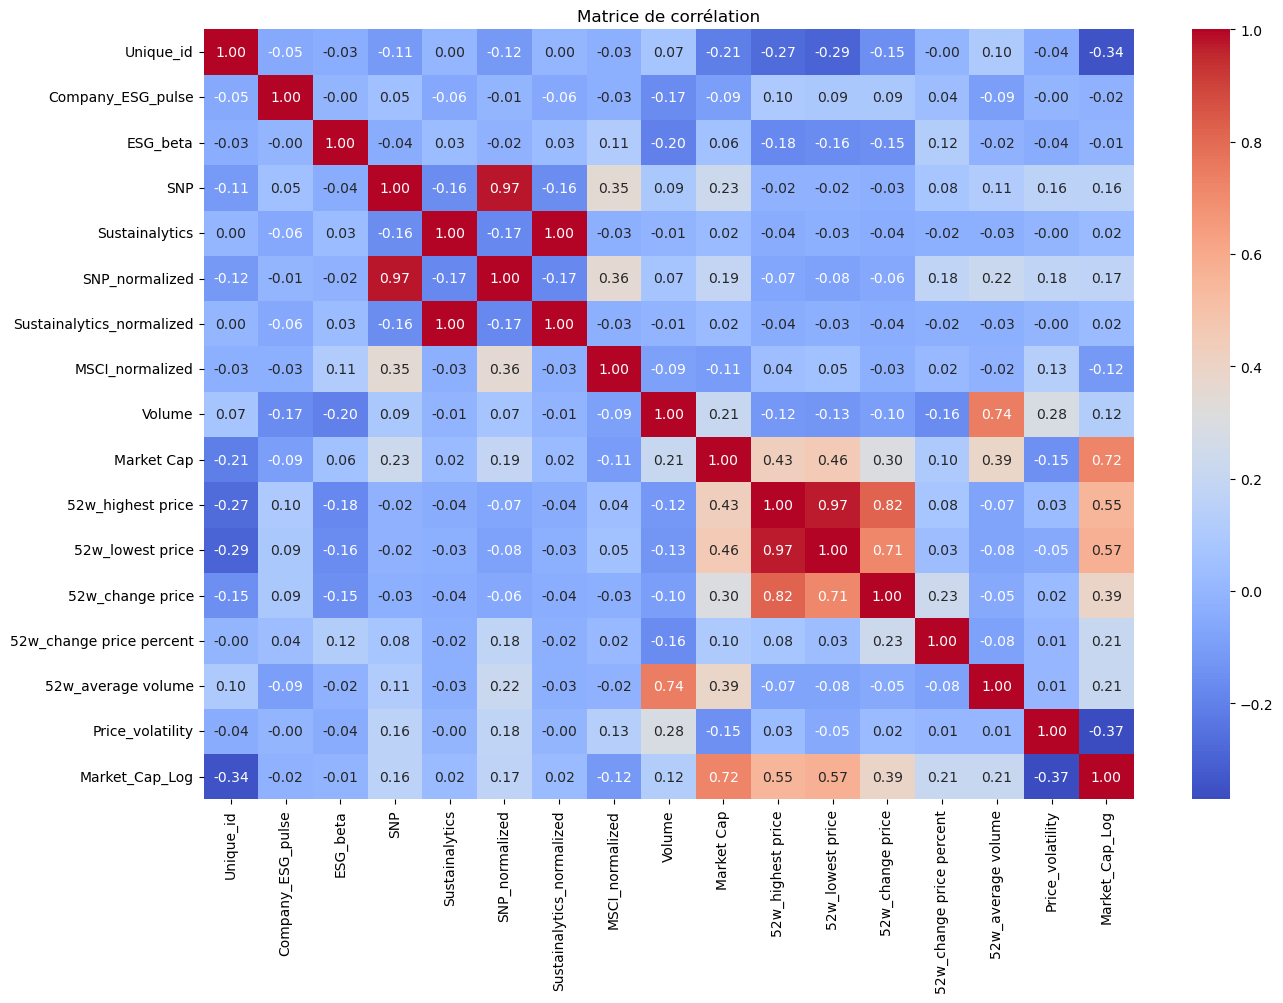

In [238]:
# Calculer la matrice de corrélation
correlation_matrix = data.corr(numeric_only=True)

# Afficher la matrice avec un heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()


In [239]:
# Gestion des valeurs manquantes

In [240]:
# Supprimer les colonnes avec +60% de valeurs manquantes
missing_ratio = data.isnull().mean()
cols_to_drop = missing_ratio[missing_ratio > 0.6].index
data.drop(columns=cols_to_drop, inplace=True)

In [241]:
# Remplir les colonnes numériques restantes avec la médiane
numeric_cols = data.select_dtypes(include='number').columns
for col in numeric_cols:
    data[col].fillna(data[col].median(), inplace=True)

C:\Users\proprietaire\AppData\Local\Temp\ipykernel_23420\3927599728.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [246]:
# Remplir les colonnes catégorielles avec le mode ou "Inconnu"
categorical_cols = data.select_dtypes(include='object').columns
for col in categorical_cols:
    mode_value = data[col].mode().iloc[0] if not data[col].mode().empty else "Inconnu"
    data[col].fillna(mode_value, inplace=True)


C:\Users\proprietaire\AppData\Local\Temp\ipykernel_23420\1360205643.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [248]:
#Supprimer les lignes qui ont encore plus de 50% de valeurs manquantes
data = data[data.isnull().mean(axis=1) < 0.5]

In [250]:
print("Résumé des données manquantes après nettoyage :")
print(data.isnull().sum())

Résumé des données manquantes après nettoyage :
Unique_id                   0
Symbol                      0
Company_name                0
Exchange                    0
gicSector                   0
gicSubindustry              0
Company_ESG_pulse           0
SNP                         0
Update_date-ESG_scores      0
Address                     0
Country                     0
52w_highest price           0
52w_lowest price            0
52w_change price            0
52w_change price percent    0
52w_average volume          0
isin                        0
cusip                       0
Securities_type             0
Currency_code               0
Price_volatility            0
dtype: int64


In [52]:
data.head()

,Unique_id,Symbol,Company_name,Exchange,gicSector,gicSubindustry,Company_ESG_pulse,SNP,Update_date-ESG_scores,Address,...,52w_highest price,52w_lowest price,52w_change price,52w_change price percent,52w_average volume,isin,cusip,Securities_type,Currency_code,Price_volatility
0,190179,MMM,3M Company,New York Stock Exchange,Industrials,Industrial Conglomerates,-0.083992,67.0,3/7/2022,"3M Center, St. Paul, MN, United States, 55144",...,113.200,85.340,-11.290,-10.83,1648276.0,US88579Y1010,88579Y101,Common Stock,USD,32.645887
1,205868,JOBS,"51job, Inc",Nasdaq,Industrials,Human Resource & Employment Services,0.776978,89.0,3/7/2022,"Building 3, Shanghai, China, 201203",...,41.935,20.705,2.915,18.35,133674.0,US3168271043,316827104,Common Stock,USD,79.432765
2,191323,AOS,A. O. Smith Corporation,New York Stock Exchange,Industrials,Building Products,0.251170,17.0,3/7/2022,"11270 West Park Place, Milwaukee, WI, United S...",...,89.960,63.880,19.470,29.49,452457.0,US8318652091,831865209,Common Stock,USD,40.826550
3,206373,AAON,"AAON, Inc",Nasdaq,Industrials,Building Products,0.739143,29.0,1/7/2023,"2425 South Yukon Avenue, Tulsa, OK, United Sta...",...,107.090,52.240,-10.145,-10.51,157665.0,US0003602069,000360206,Common Stock,USD,104.996172
4,190905,AIR,AAR Corp,New York Stock Exchange,Industrials,Aerospace & Defense,0.588800,35.0,1/7/2023,"One AAR Place, Wood Dale, IL, United States, 6...",...,73.950,50.060,6.670,12.26,74456.0,US0003611052,000361105,Common Stock,USD,47.722733


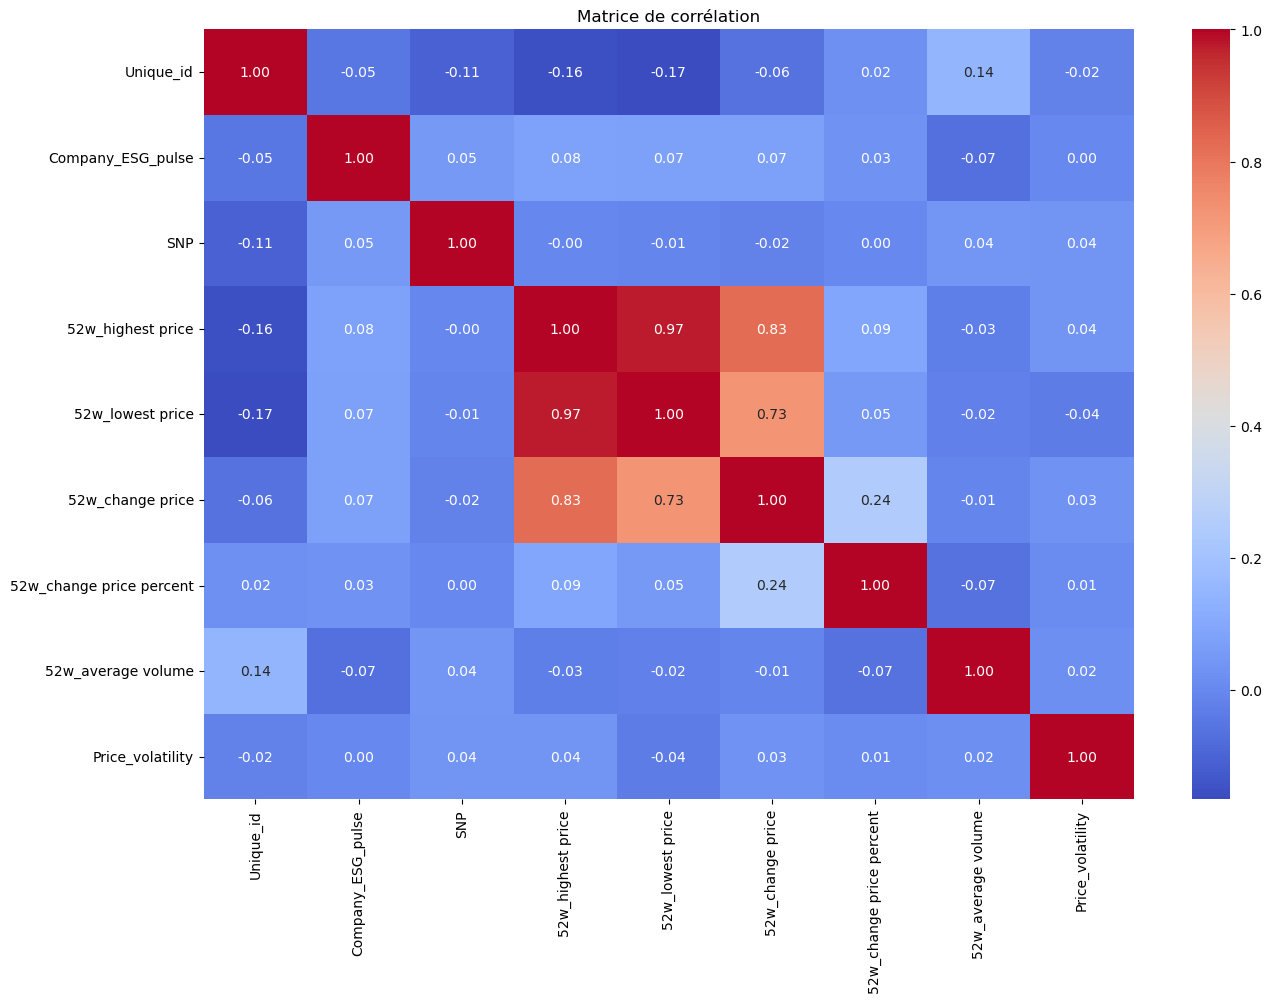

In [54]:
# Calculer la matrice de corrélation
correlation_matrix = data.corr(numeric_only=True)

# Afficher la matrice avec un heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()


In [ ]:
#ANALYSES ESG APPROFONDIES

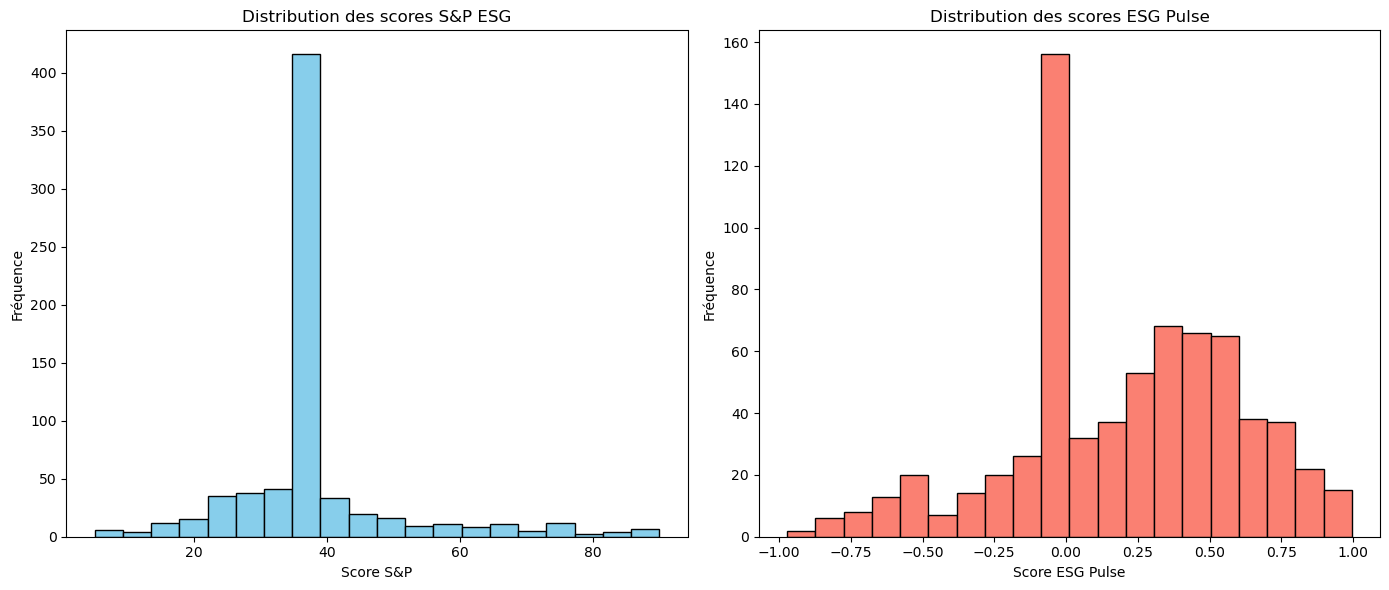

In [66]:
# Nouvelle figure avec seulement 1 ligne et 2 graphiques
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# S&P ESG Score
axes[0].hist(data['SNP'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title("Distribution des scores S&P ESG")
axes[0].set_xlabel("Score S&P")
axes[0].set_ylabel("Fréquence")

# Company ESG Pulse
axes[1].hist(data['Company_ESG_pulse'], bins=20, color='salmon', edgecolor='black')
axes[1].set_title("Distribution des scores ESG Pulse")
axes[1].set_xlabel("Score ESG Pulse")
axes[1].set_ylabel("Fréquence")

plt.tight_layout()
plt.show()


Comparaison des scores ESG entre agences:


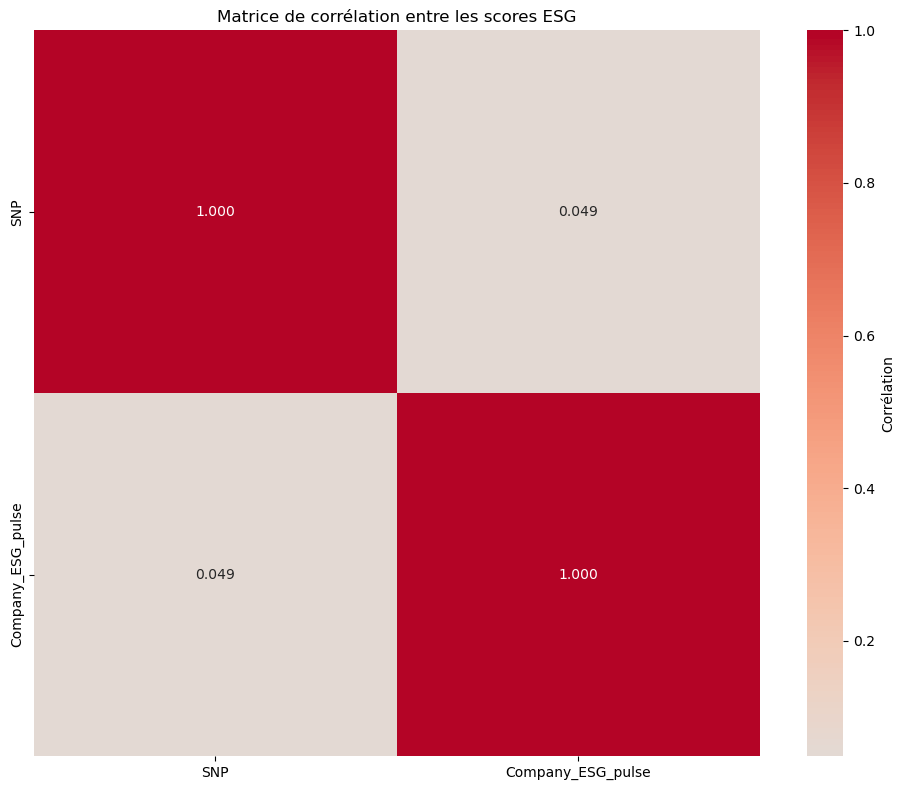

Corrélations entre agences ESG:
                        SNP  Company_ESG_pulse
SNP                1.000000           0.049047
Company_ESG_pulse  0.049047           1.000000


In [75]:
print("\nComparaison des scores ESG entre agences:")

esg_agencies = ['SNP', 'Company_ESG_pulse']
esg_data = data[esg_agencies].dropna()

if len(esg_data) > 0:
    # Matrice de corrélation entre les scores ESG
    correlation_matrix = esg_data.corr()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, 
                annot=True, 
                cmap='coolwarm', 
                center=0, 
                square=True, 
                fmt='.3f', 
                cbar_kws={'label': 'Corrélation'})  # Correction ici: cbar_kws au lieu de cbart_kws
    
    plt.title('Matrice de corrélation entre les scores ESG')
    plt.tight_layout()
    plt.show()
    
    print("Corrélations entre agences ESG:")
    print(correlation_matrix)

In [ ]:
#Analyse sectorielle : Moyenne des scores ESG par secteur (gicSector)

<Figure size 1200x600 with 0 Axes>

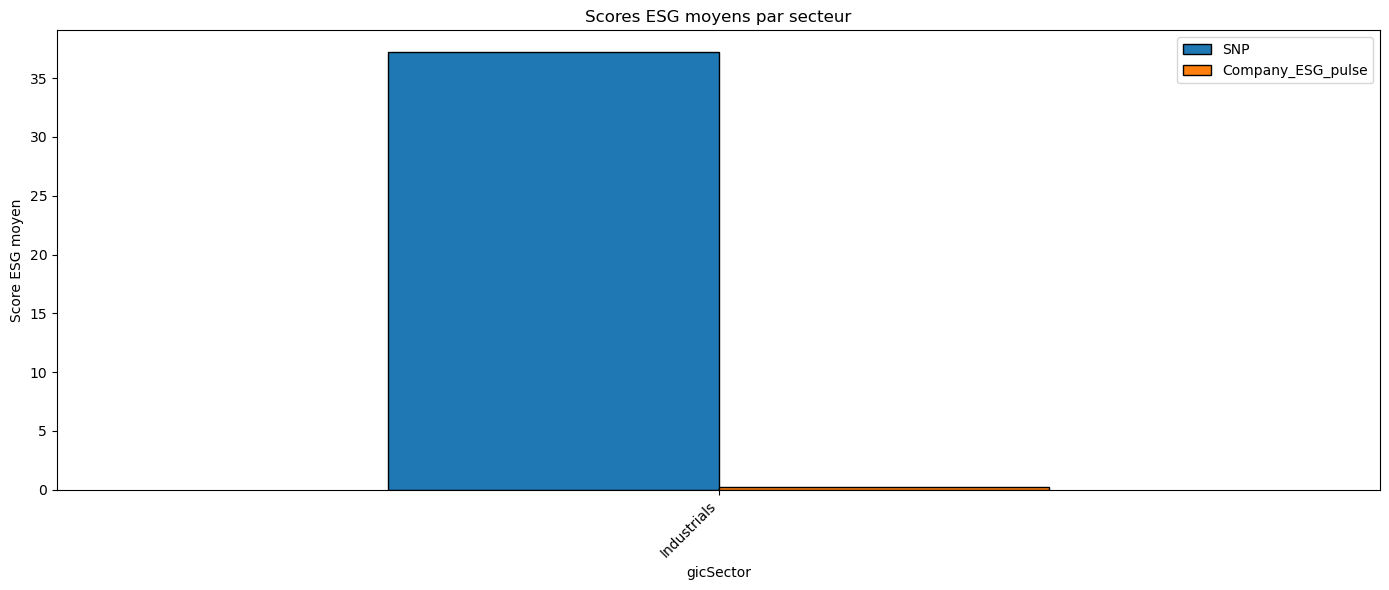

In [77]:
import seaborn as sns

# Moyenne des scores ESG par secteur
esg_by_sector = data.groupby('gicSector')[['SNP', 'Company_ESG_pulse']].mean().sort_values('SNP', ascending=False)

# Affichage
plt.figure(figsize=(12, 6))
esg_by_sector.plot(kind='bar', figsize=(14, 6), edgecolor='black')
plt.title("Scores ESG moyens par secteur")
plt.ylabel("Score ESG moyen")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


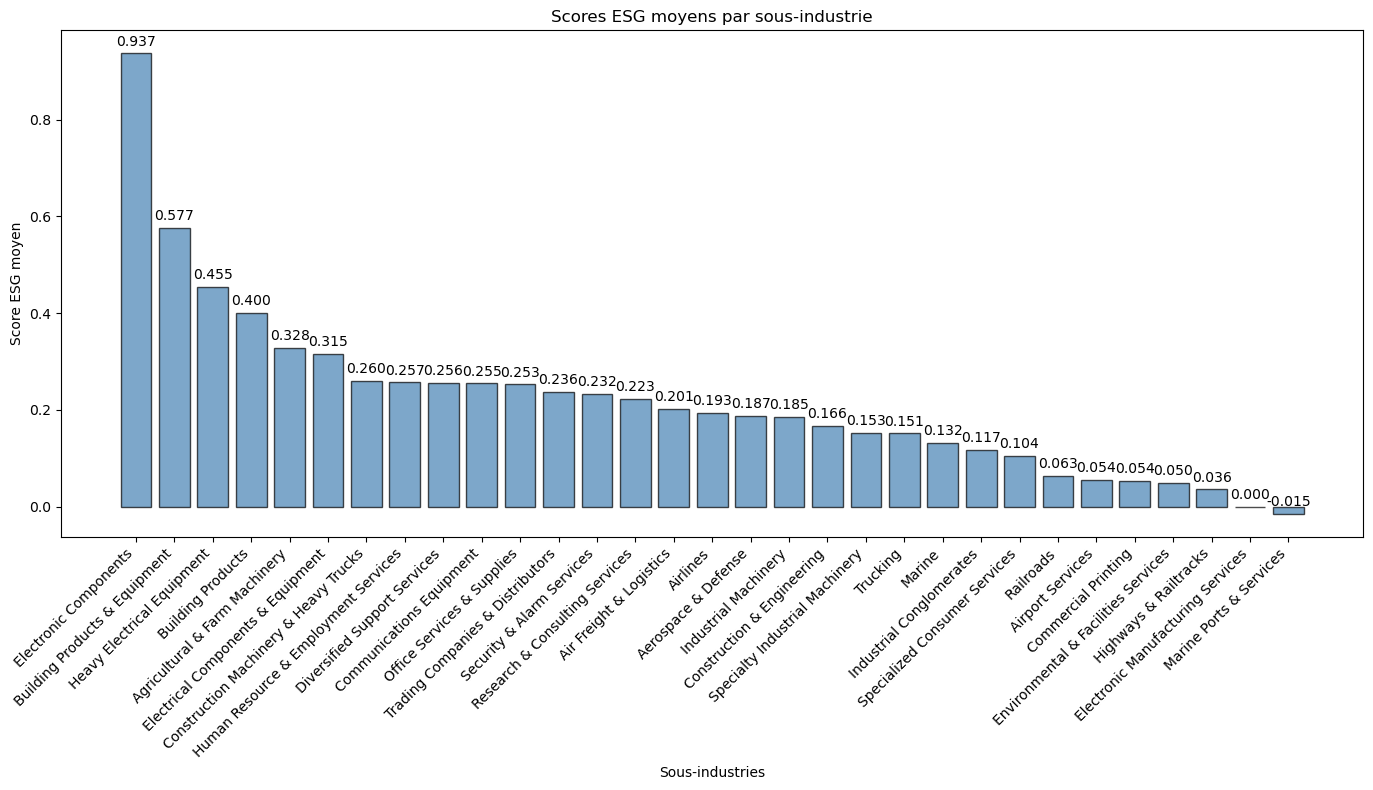

Scores ESG moyens par sous-industrie:
                           gicSubindustry      mean  count       std
13                  Electronic Components  0.937100      1       NaN
6           Building Products & Equipment  0.577030      1       NaN
16             Heavy Electrical Equipment  0.454551     15  0.300834
5                       Building Products  0.400397     36  0.378469
1           Agricultural & Farm Machinery  0.328345      8  0.259417
12      Electrical Components & Equipment  0.314880     52  0.368217
10  Construction Machinery & Heavy Trucks  0.259871     35  0.351255
18   Human Resource & Employment Services  0.256623     22  0.405741
11           Diversified Support Services  0.256206     17  0.363136
8                Communications Equipment  0.254633      1       NaN
23             Office Services & Supplies  0.252509     16  0.401696
29       Trading Companies & Distributors  0.236363     58  0.447481
26              Security & Alarm Services  0.232249      2  0.225

In [122]:
# Scores ESG moyens par sous-industrie
if 'gicSubindustry' in data.columns and 'Company_ESG_pulse' in data.columns:
    esg_by_industry = data.groupby('gicSubindustry')['Company_ESG_pulse'].agg(['mean', 'count', 'std']).reset_index()
    esg_by_industry = esg_by_industry.sort_values('mean', ascending=False)
    
    plt.figure(figsize=(14, 8))
    bars = plt.bar(range(len(esg_by_industry)), esg_by_industry['mean'], 
                   color='steelblue', alpha=0.7, edgecolor='black')
    plt.xlabel('Sous-industries')
    plt.ylabel('Score ESG moyen')
    plt.title('Scores ESG moyens par sous-industrie')
    plt.xticks(range(len(esg_by_industry)), esg_by_industry['gicSubindustry'], rotation=45, ha='right')
    
    # Ajout des valeurs sur les barres
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    print("Scores ESG moyens par sous-industrie:")
    print(esg_by_industry)

In [ ]:
#Corrélation ESG ↔ performance financière

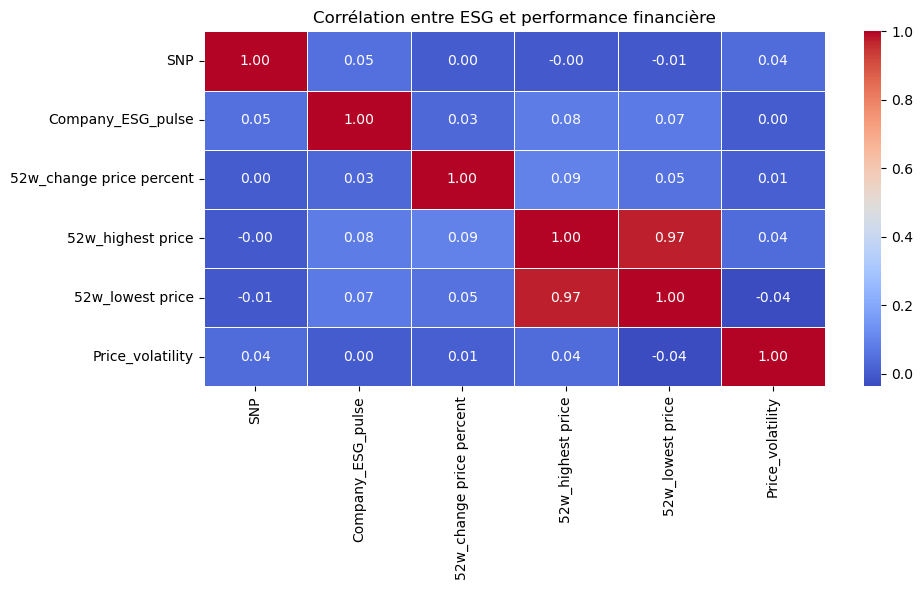

In [85]:
# On sélectionne les variables numériques pertinentes
esg_perf_vars = ['SNP', 'Company_ESG_pulse', '52w_change price percent', '52w_highest price', '52w_lowest price', 'Price_volatility']
# Calcul de la matrice de corrélation
corr_matrix = data[esg_perf_vars].corr()
# Affichage avec une heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Corrélation entre ESG et performance financière")
plt.tight_layout()
plt.show()


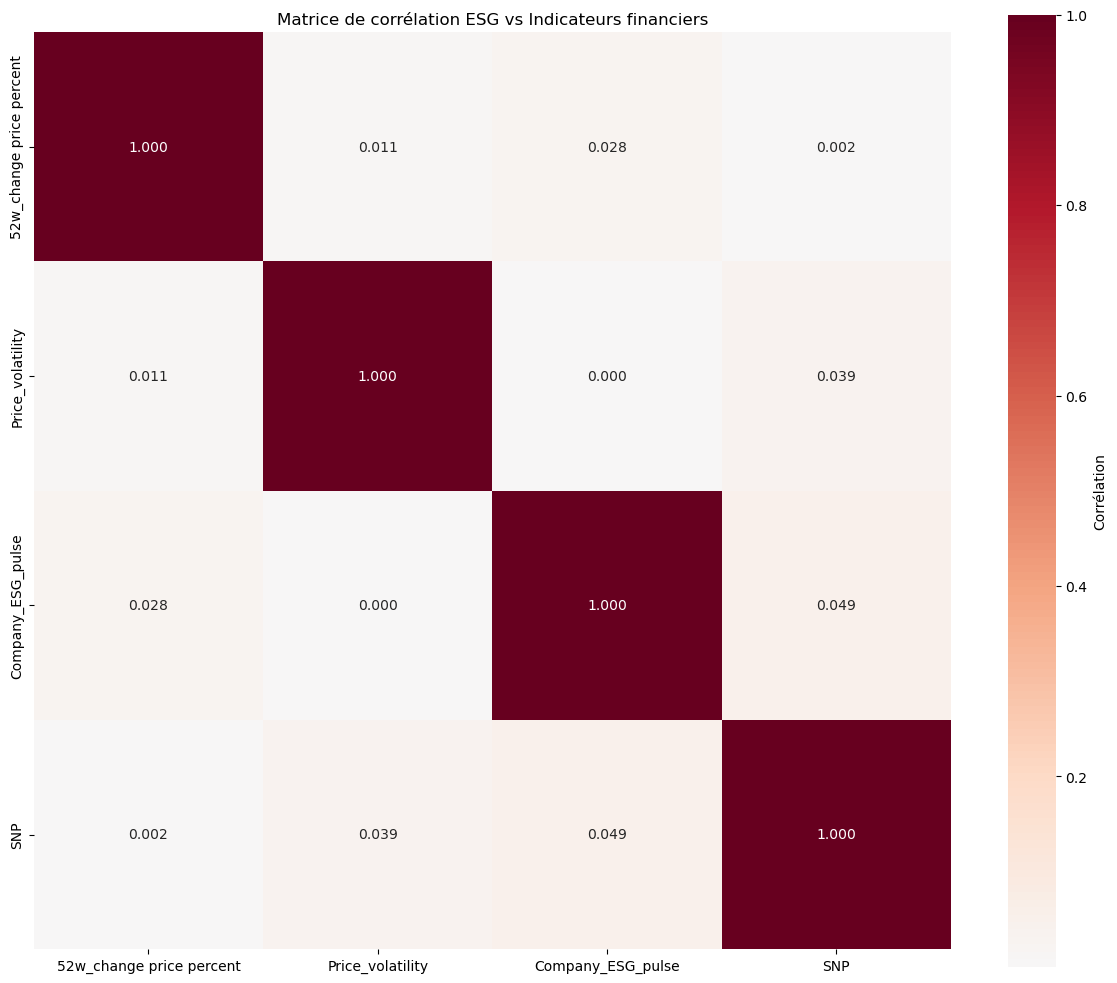

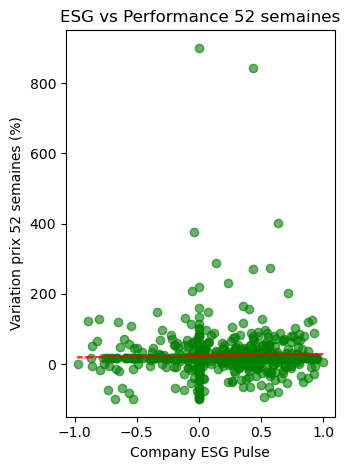

In [109]:
# Analyse de corrélation entre scores ESG et indicateurs financiers
financial_indicators = ['Market Cap', '52w_change price percent', 'Volume', 'Price_volatility']
esg_indicators = ['Company_ESG_pulse', 'SNP', 'Sustainalytics', 'ESG_beta']

# Matrice de corrélation ESG vs Financier
available_financial = [col for col in financial_indicators if col in data.columns]
available_esg = [col for col in esg_indicators if col in data.columns]

if available_financial and available_esg:
    correlation_data = data[available_financial + available_esg].corr()
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_data, annot=True, cmap='RdBu_r', center=0, 
                square=True, fmt='.3f', cbar_kws={'label': 'Corrélation'})
    plt.title('Matrice de corrélation ESG vs Indicateurs financiers')
    plt.tight_layout()
    plt.show()

# Scatter plots ESG vs Performance
if 'Company_ESG_pulse' in data.columns and 'Market Cap' in data.columns:
    plt.figure(figsize=(12, 5))
    
    # ESG vs Market Cap
    plt.subplot(1, 2, 1)
    plt.scatter(data['Company_ESG_pulse'], data['Market Cap'], alpha=0.6, color='blue')
    plt.xlabel('Company ESG Pulse')
    plt.ylabel('Capitalisation boursière')
    plt.title('ESG vs Capitalisation boursière')
    
    # Ligne de tendance
    if data[['Company_ESG_pulse', 'Market Cap']].dropna().shape[0] > 1:
        z = np.polyfit(data['Company_ESG_pulse'].dropna(), 
                      data['Market Cap'].dropna(), 1)
        p = np.poly1d(z)
        plt.plot(data['Company_ESG_pulse'].dropna(), 
                p(data['Company_ESG_pulse'].dropna()), "r--", alpha=0.8)

# ESG vs Performance 52 semaines
if '52w_change price percent' in data.columns:
    plt.subplot(1, 2, 2)
    plt.scatter(data['Company_ESG_pulse'], data['52w_change price percent'], alpha=0.6, color='green')
    plt.xlabel('Company ESG Pulse')
    plt.ylabel('Variation prix 52 semaines (%)')
    plt.title('ESG vs Performance 52 semaines')
    
    # Ligne de tendance
    if data[['Company_ESG_pulse', '52w_change price percent']].dropna().shape[0] > 1:
        z = np.polyfit(data['Company_ESG_pulse'].dropna(), 
                      data['52w_change price percent'].dropna(), 1)
        p = np.poly1d(z)
        plt.plot(data['Company_ESG_pulse'].dropna(), 
                p(data['Company_ESG_pulse'].dropna()), "r--", alpha=0.8)

plt.tight_layout()
plt.show()


In [124]:
from scipy.stats import pearsonr, spearmanr
import numpy as np

print("Corrélations statistiques ESG-Finance:")
for esg_col in available_esg:
    for fin_col in available_financial:
        # Nettoyage des données
        clean_data = data[[esg_col, fin_col]].replace([np.inf, -np.inf], np.nan).dropna()
        
        if len(clean_data) >= 3:  # Minimum 3 observations
            x = clean_data[esg_col]
            y = clean_data[fin_col]
            
            try:
                # Calcul des corrélations
                corr_pearson, p_val_pearson = pearsonr(x, y)
                corr_spearman, p_val_spearman = spearmanr(x, y)
                
                print(f"\n{esg_col} vs {fin_col} (N={len(clean_data)}):")
                print(f"  Pearson: r = {corr_pearson:.3f} (p-value: {p_val_pearson:.3f})")
                print(f"  Spearman: ρ = {corr_spearman:.3f} (p-value: {p_val_spearman:.3f})")
                
                # Interprétation
                if p_val_pearson < 0.05:
                    strength = "forte" if abs(corr_pearson) > 0.5 else "modérée" if abs(corr_pearson) > 0.3 else "faible"
                    print(f"  → Corrélation {strength} significative (p < 0.05)")
                else:
                    print("  → Pas de corrélation significative")
                    
            except Exception as e:
                print(f"\nErreur dans {esg_col} vs {fin_col}: {str(e)}")
                continue

Corrélations statistiques ESG-Finance:

Company_ESG_pulse vs 52w_change price percent (N=705):
  Pearson: r = 0.028 (p-value: 0.464)
  Spearman: ρ = 0.037 (p-value: 0.326)
  → Pas de corrélation significative

Company_ESG_pulse vs Price_volatility (N=699):
  Pearson: r = 0.000 (p-value: 0.993)
  Spearman: ρ = -0.071 (p-value: 0.062)
  → Pas de corrélation significative

SNP vs 52w_change price percent (N=705):
  Pearson: r = 0.002 (p-value: 0.951)
  Spearman: ρ = -0.020 (p-value: 0.590)
  → Pas de corrélation significative

SNP vs Price_volatility (N=699):
  Pearson: r = 0.039 (p-value: 0.309)
  Spearman: ρ = 0.043 (p-value: 0.254)
  → Pas de corrélation significative


In [ ]:
# ANALYSE GÉOGRAPHIQUE

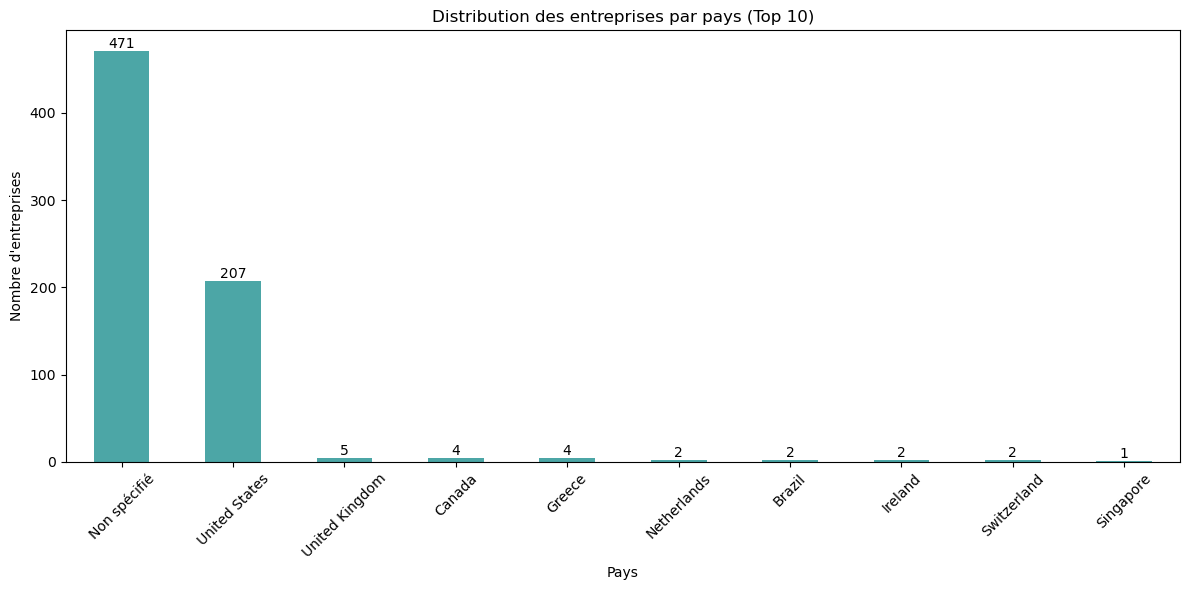


Répartition par pays (complète):
Country
Non spécifié      471
United States     207
United Kingdom      5
Canada              4
Greece              4
Netherlands         2
Brazil              2
Ireland             2
Switzerland         2
Singapore           1
Panama              1
Cayman Islands      1
Mexico              1
Monaco              1
China               1


C:\Users\proprietaire\AppData\Local\Temp\ipykernel_23420\766977898.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Country', y='Moyenne', data=esg_by_country,


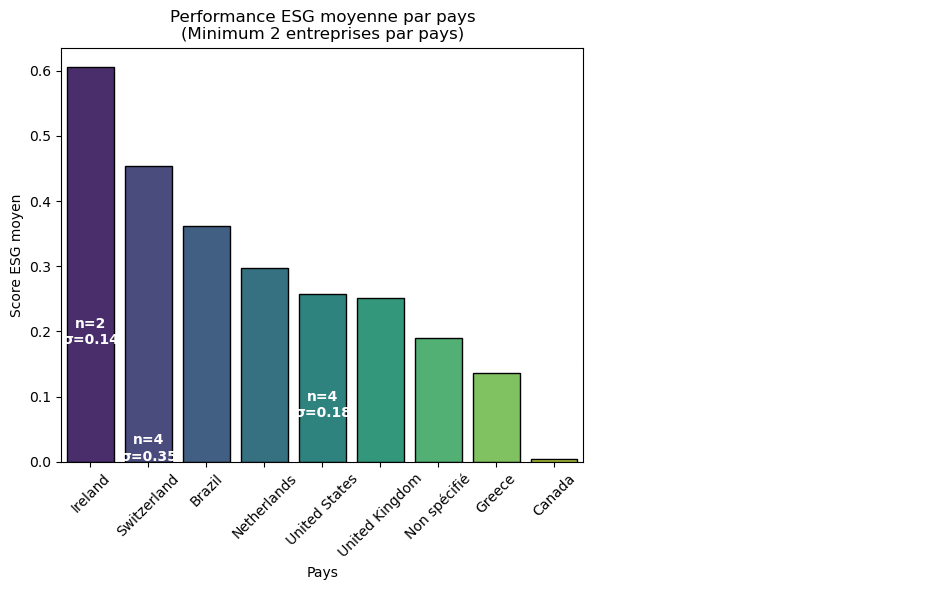


Statistiques ESG par pays :


,Country,Moyenne,Nb_entreprises,Ecart-type,Médiane
5,Ireland,0.60,2,0.10,0.604805
12,Switzerland,0.45,2,0.16,0.453167
0,Brazil,0.36,2,0.14,0.361618
8,Netherlands,0.30,2,0.54,0.297816
14,United States,0.26,207,0.37,0.324300
13,United Kingdom,0.25,5,0.24,0.357438
9,Non spécifié,0.19,471,0.40,0.143204
4,Greece,0.14,4,0.18,0.090384
1,Canada,0.00,4,0.35,-0.003395


In [128]:
# Distribution des entreprises par pays
if 'Country' in data.columns:
    # Analyse de la distribution
    country_counts = data['Country'].value_counts()
    
    # Visualisation Top 10
    plt.figure(figsize=(12, 6))
    ax = country_counts.head(10).plot(kind='bar', color='teal', alpha=0.7)
    plt.title('Distribution des entreprises par pays (Top 10)')
    plt.xlabel('Pays')
    plt.ylabel("Nombre d'entreprises")
    
    # Ajout des valeurs sur les barres
    for p in ax.patches:
        ax.annotate(f"{int(p.get_height())}", 
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Affichage des statistiques complètes
    print("\nRépartition par pays (complète):")
    print(country_counts.to_string())

# Performance ESG par pays
if all(col in data.columns for col in ['Country', 'Company_ESG_pulse']):
    esg_by_country = (data.groupby('Country')['Company_ESG_pulse']
                      .agg(['mean', 'count', 'std', 'median'])
                      .reset_index()
                      .rename(columns={'mean': 'Moyenne', 'count': 'Nb_entreprises', 
                                      'std': 'Ecart-type', 'median': 'Médiane'}))
    
    # Filtre et tri
    esg_by_country = esg_by_country[esg_by_country['Nb_entreprises'] >= 2].sort_values('Moyenne', ascending=False)
    
    if not esg_by_country.empty:
        # Visualisation
        plt.figure(figsize=(12, 6))
        ax = sns.barplot(x='Country', y='Moyenne', data=esg_by_country,
                        palette='viridis', edgecolor='black')
        
        plt.title('Performance ESG moyenne par pays\n(Minimum 2 entreprises par pays)')
        plt.xlabel('Pays')
        plt.ylabel('Score ESG moyen')
        plt.xticks(rotation=45)
        
        # Ajout des indicateurs de variabilité
        for i, row in esg_by_country.iterrows():
            plt.text(i, row['Moyenne']/2, 
                    f"n={row['Nb_entreprises']}\nσ={row['Ecart-type']:.2f}",
                    ha='center', color='white', fontweight='bold')
        
        plt.tight_layout()
        plt.show()
        
        # Affichage du tableau complet
        print("\nStatistiques ESG par pays :")
        display(esg_by_country.style
                .background_gradient(cmap='Blues', subset=['Moyenne', 'Médiane'])
                .format({'Moyenne': '{:.2f}', 'Ecart-type': '{:.2f}'}))

In [ ]:
#ANALYSE DE VOLATILITÉ 

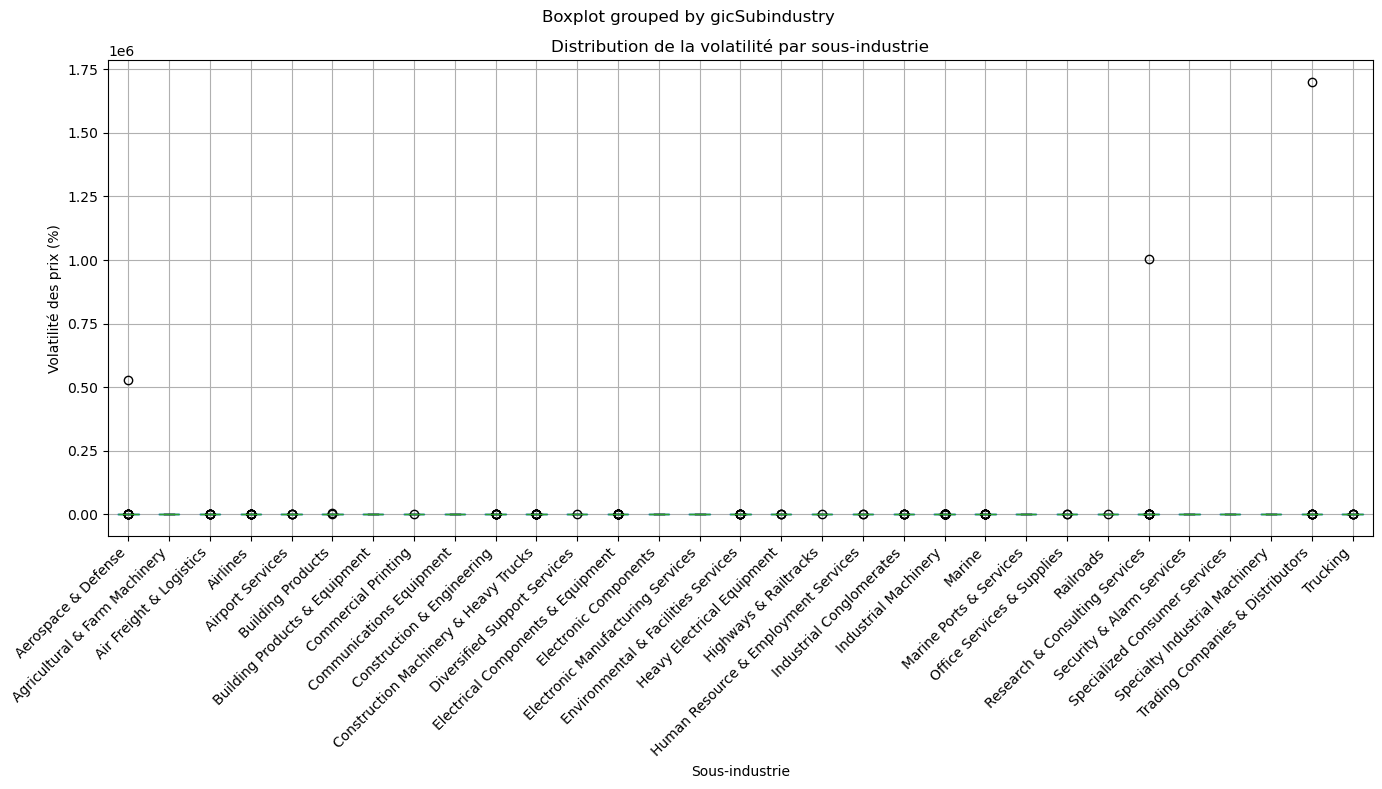

In [146]:
# Distribution de la volatilité par sous-industrie
if 'Price_volatility' in data.columns and 'gicSubindustry' in data.columns:
    plt.figure(figsize=(14, 8))
    data.boxplot(column='Price_volatility', by='gicSubindustry', ax=plt.gca())
    plt.title('Distribution de la volatilité par sous-industrie')
    plt.xlabel('Sous-industrie')
    plt.ylabel('Volatilité des prix (%)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

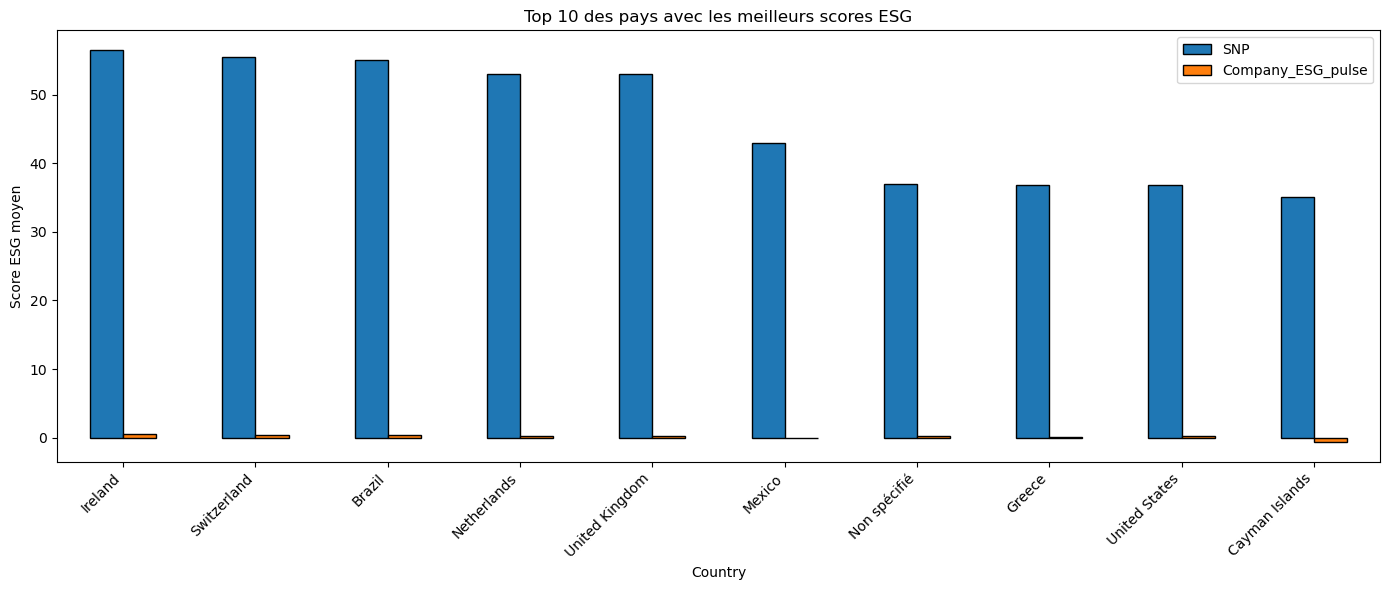

In [150]:
# Moyenne des scores ESG par pays (top 10 pour lisibilité)
esg_by_country = data.groupby('Country')[['SNP', 'Company_ESG_pulse']].mean().sort_values('SNP', ascending=False).head(10)

# Visualisation
esg_by_country.plot(kind='bar', figsize=(14, 6), edgecolor='black')
plt.title("Top 10 des pays avec les meilleurs scores ESG")
plt.ylabel("Score ESG moyen")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



C:\Users\proprietaire\AppData\Local\Temp\ipykernel_23420\1116309203.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='ESG_classe', palette='Set2', order=['Bon', 'Moyen', 'Faible'])


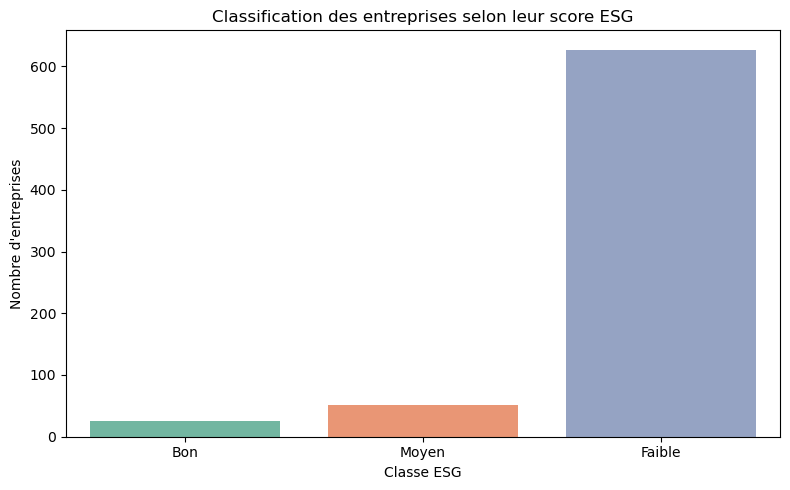

In [152]:
# Classification ESG simple
def classer_esg(score):
    if score >= 70:
        return "Bon"
    elif score >= 50:
        return "Moyen"
    else:
        return "Faible"

data['ESG_classe'] = data['SNP'].apply(classer_esg)

# Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='ESG_classe', palette='Set2', order=['Bon', 'Moyen', 'Faible'])
plt.title("Classification des entreprises selon leur score ESG")
plt.xlabel("Classe ESG")
plt.ylabel("Nombre d'entreprises")
plt.tight_layout()
plt.show()


C:\Users\proprietaire\AppData\Local\Temp\ipykernel_23420\2710682383.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='gicSector', y='SNP', palette='coolwarm')


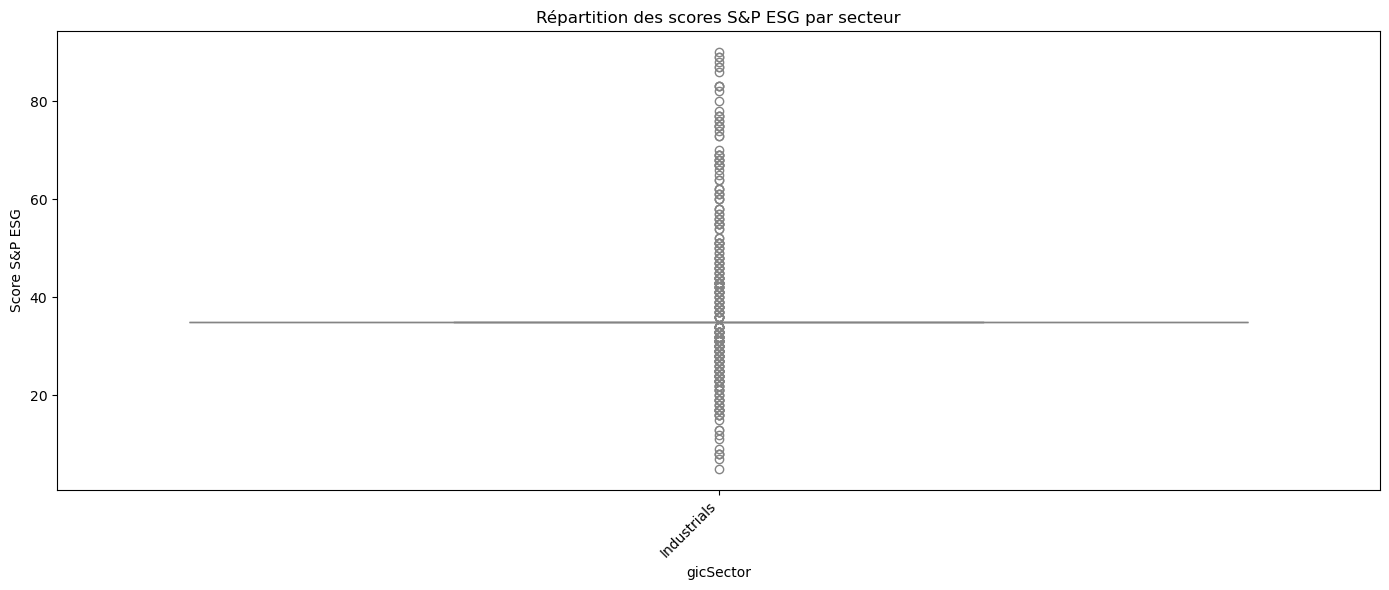

In [154]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=data, x='gicSector', y='SNP', palette='coolwarm')
plt.title("Répartition des scores S&P ESG par secteur")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Score S&P ESG")
plt.tight_layout()
plt.show()

In [ ]:
#Analyse temporelle des scores ESG

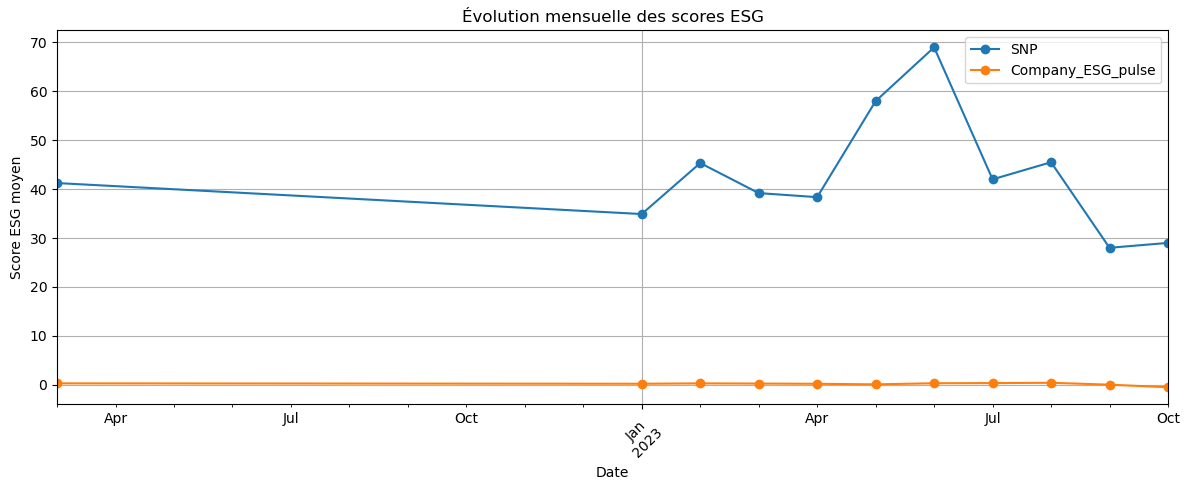

In [156]:
# S'assurer que la colonne est au format datetime
data['Update_date-ESG_scores'] = pd.to_datetime(data['Update_date-ESG_scores'])

# Regrouper par mois
esg_temps = data.groupby(data['Update_date-ESG_scores'].dt.to_period('M'))[['SNP', 'Company_ESG_pulse']].mean()

# Affichage
esg_temps.plot(figsize=(12, 5), marker='o')
plt.title("Évolution mensuelle des scores ESG")
plt.xlabel("Date")
plt.ylabel("Score ESG moyen")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#Analyse par type de sécurité 

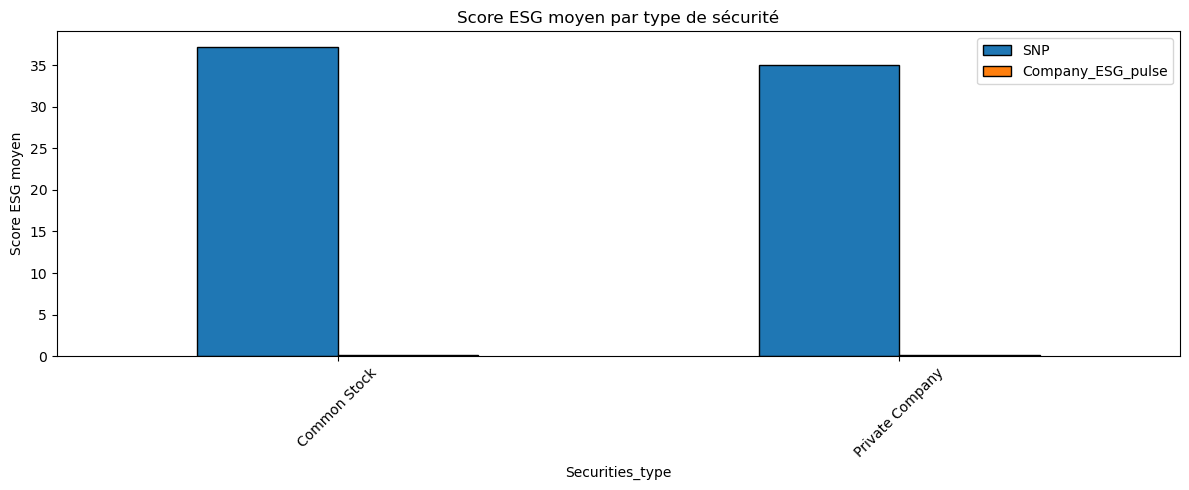

In [158]:
# Moyenne des scores ESG par type de sécurité
esg_by_type = data.groupby('Securities_type')[['SNP', 'Company_ESG_pulse']].mean()

# Visualisation
esg_by_type.plot(kind='bar', figsize=(12, 5), edgecolor='black')
plt.title("Score ESG moyen par type de sécurité")
plt.ylabel("Score ESG moyen")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [160]:
# Top 20 entreprises ESG selon S&P
top_esg = data[['Company_name', 'Country', 'gicSector', 'SNP', 'Company_ESG_pulse']].sort_values(by='SNP', ascending=False).head(20)

# Export vers CSV
top_esg.to_csv('top_entreprises_esg.csv', index=False)

print("Fichier 'top_entreprises_esg.csv' exporté avec succès !")


Fichier 'top_entreprises_esg.csv' exporté avec succès !


### MODÉLISATION PRÉDICTIVE

In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

8.1 Prédiction des scores ESG manquants
Scores R² validation croisée: [-0.05659967 -0.12563138 -0.19714043 -0.2192196   0.02015114]
Moyenne R²: -0.116 (±0.089)

Performance sur le test set:
- MSE: 0.1799
- MAE: 0.3427
- R²: -0.1009

Importance des variables:
                 Feature  Importance
52w_change price percent    0.545415
        Price_volatility    0.454585


C:\Users\proprietaire\AppData\Local\Temp\ipykernel_23420\733086476.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_esg, palette='viridis', ax=ax[0])


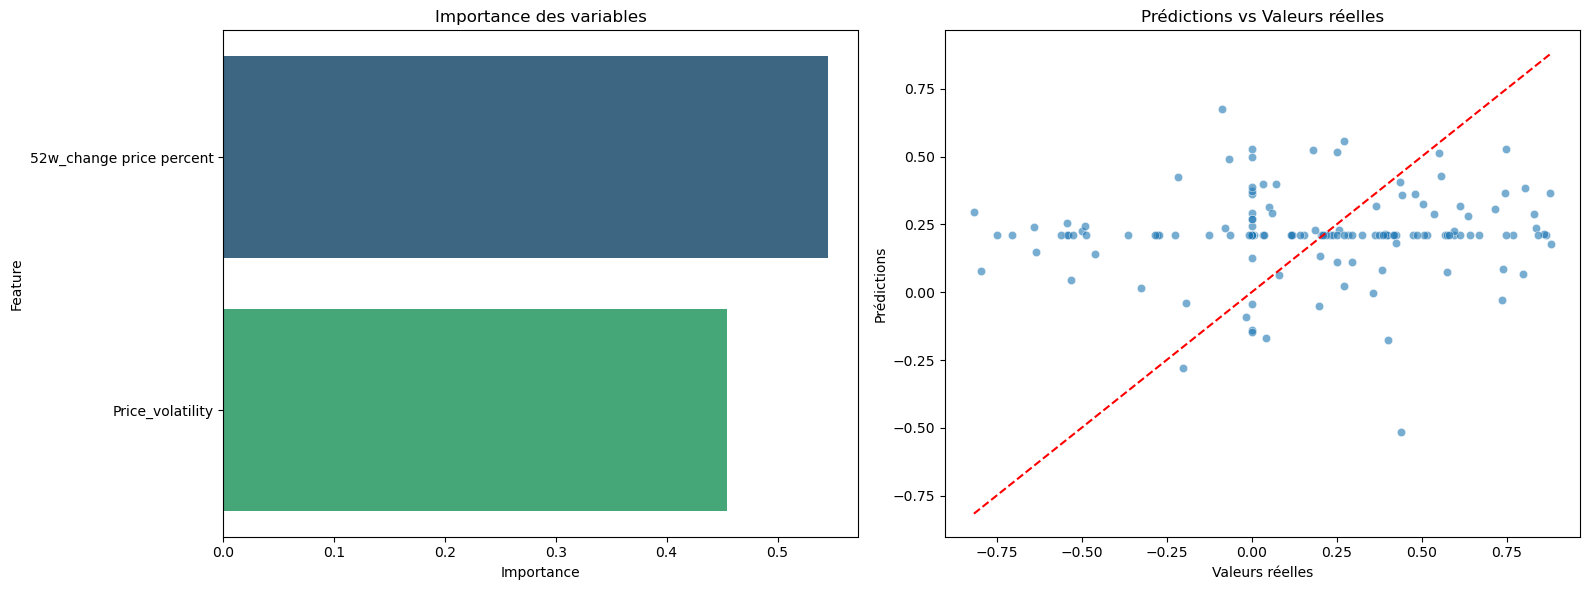

In [172]:
print("8.1 Prédiction des scores ESG manquants")

# Variables disponibles dans tes données actuelles
features_for_esg = ['52w_change price percent', 'Price_volatility']
available_features = [col for col in features_for_esg if col in data.columns]

if available_features and 'Company_ESG_pulse' in data.columns:
    # Nettoyage des données
    data_clean = data[available_features + ['Company_ESG_pulse']].replace([np.inf, -np.inf], np.nan)
    
    # Séparation des données connues/inconnues
    esg_known = data_clean[data_clean['Company_ESG_pulse'].notna()]
    esg_unknown = data_clean[data_clean['Company_ESG_pulse'].isna()]
    
    if len(esg_known) > 10 and len(available_features) > 0:
        # Imputation
        imputer = SimpleImputer(strategy='median')
        X_esg = imputer.fit_transform(esg_known[available_features])
        y_esg = esg_known['Company_ESG_pulse'].values

        # Standardisation
        scaler = StandardScaler()
        X_esg = scaler.fit_transform(X_esg)

        # Split
        X_train_esg, X_test_esg, y_train_esg, y_test_esg = train_test_split(
            X_esg, y_esg, test_size=0.2, random_state=42)

        # Modèle RandomForest
        rf_esg = RandomForestRegressor(n_estimators=200, random_state=42)

        # Validation croisée
        cv_scores = cross_val_score(rf_esg, X_train_esg, y_train_esg, cv=5, scoring='r2')
        print(f"Scores R² validation croisée: {cv_scores}")
        print(f"Moyenne R²: {np.mean(cv_scores):.3f} (±{np.std(cv_scores):.3f})")

        # Entraînement
        rf_esg.fit(X_train_esg, y_train_esg)

        # Évaluation
        y_pred_esg = rf_esg.predict(X_test_esg)
        print(f"\nPerformance sur le test set:")
        print(f"- MSE: {mean_squared_error(y_test_esg, y_pred_esg):.4f}")
        print(f"- MAE: {mean_absolute_error(y_test_esg, y_pred_esg):.4f}")
        print(f"- R²: {r2_score(y_test_esg, y_pred_esg):.4f}")

        # Importance
        feature_importance_esg = pd.DataFrame({
            'Feature': available_features,
            'Importance': rf_esg.feature_importances_
        }).sort_values('Importance', ascending=False)
        print("\nImportance des variables:")
        print(feature_importance_esg.to_string(index=False))

        # Visualisation
        fig, ax = plt.subplots(1, 2, figsize=(16, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_importance_esg, palette='viridis', ax=ax[0])
        ax[0].set_title('Importance des variables')
        sns.scatterplot(x=y_test_esg, y=y_pred_esg, alpha=0.6, ax=ax[1])
        ax[1].plot([y_test_esg.min(), y_test_esg.max()], [y_test_esg.min(), y_test_esg.max()], 'r--')
        ax[1].set_xlabel('Valeurs réelles')
        ax[1].set_ylabel('Prédictions')
        ax[1].set_title('Prédictions vs Valeurs réelles')
        plt.tight_layout()
        plt.show()

        # Prédiction des valeurs manquantes
        if len(esg_unknown) > 0:
            X_missing = imputer.transform(esg_unknown[available_features])
            X_missing = scaler.transform(X_missing)
            predicted_esg = rf_esg.predict(X_missing)

            print(f"\nPrédiction pour {len(esg_unknown)} valeurs manquantes :")
            print(f"- Moyenne : {predicted_esg.mean():.2f}")
            print(f"- Médiane : {np.median(predicted_esg):.2f}")
            print(f"- Min : {predicted_esg.min():.2f}")
            print(f"- Max : {predicted_esg.max():.2f}")
    else:
        print("\nDonnées insuffisantes pour l’analyse (minimum 10 lignes avec ESG connu)")
else:
    print("\nColonnes nécessaires non présentes dans le dataset")


In [174]:
print("\n8.2 Prédiction de performance financière basée sur ESG")

if '52w_change price percent' in data.columns and 'Company_ESG_pulse' in data.columns:
    # Utiliser uniquement les colonnes disponibles
    perf_features = ['Company_ESG_pulse', 'SNP']
    available_perf_features = [col for col in perf_features if col in data.columns]
    
    # Données complètes
    complete_data = data[available_perf_features + ['52w_change price percent']].dropna()
    
    if len(complete_data) > 5:
        X_perf = complete_data[available_perf_features]
        y_perf = complete_data['52w_change price percent']
        
        # Division train/test
        X_train_perf, X_test_perf, y_train_perf, y_test_perf = train_test_split(
            X_perf, y_perf, test_size=0.3, random_state=42)
        
        # Modèle de régression linéaire
        lr_perf = LinearRegression()
        lr_perf.fit(X_train_perf, y_train_perf)
        
        # Prédictions
        y_pred_perf = lr_perf.predict(X_test_perf)
        
        # Évaluation
        mse_perf = mean_squared_error(y_test_perf, y_pred_perf)
        r2_perf = r2_score(y_test_perf, y_pred_perf)
        
        print(f"Prédiction Performance - MSE: {mse_perf:.4f}, R²: {r2_perf:.4f}")
        
        # Coefficients du modèle
        coefficients_perf = pd.DataFrame({
            'feature': available_perf_features,
            'coefficient': lr_perf.coef_
        }).sort_values('coefficient', key=abs, ascending=False)
        
        print("Coefficients du modèle de prédiction de performance:")
        print(coefficients_perf)
    else:
        print("Pas assez de données complètes pour entraîner le modèle.")



8.2 Prédiction de performance financière basée sur ESG
Prédiction Performance - MSE: 2099.4922, R²: 0.0005
Coefficients du modèle de prédiction de performance:
             feature  coefficient
0  Company_ESG_pulse     2.046338
1                SNP     0.070247


### BENCHMARKING SECTORIEL AVANCÉ

Tableau de bord sectoriel:
                                Industrie  Nombre_entreprises  ESG_moyen  \
24                  Electronic Components                   1   0.937100   
26          Building Products & Equipment                   1   0.577030   
15             Heavy Electrical Equipment                  15   0.454551   
2                       Building Products                  36   0.400397   
11          Agricultural & Farm Machinery                   8   0.328345   
6       Electrical Components & Equipment                  52   0.314880   
5   Construction Machinery & Heavy Trucks                  35   0.259871   
1    Human Resource & Employment Services                  22   0.256623   
13           Diversified Support Services                  17   0.256206   
29               Communications Equipment                   1   0.254633   
8              Office Services & Supplies                  16   0.252509   
18       Trading Companies & Distributors                  58

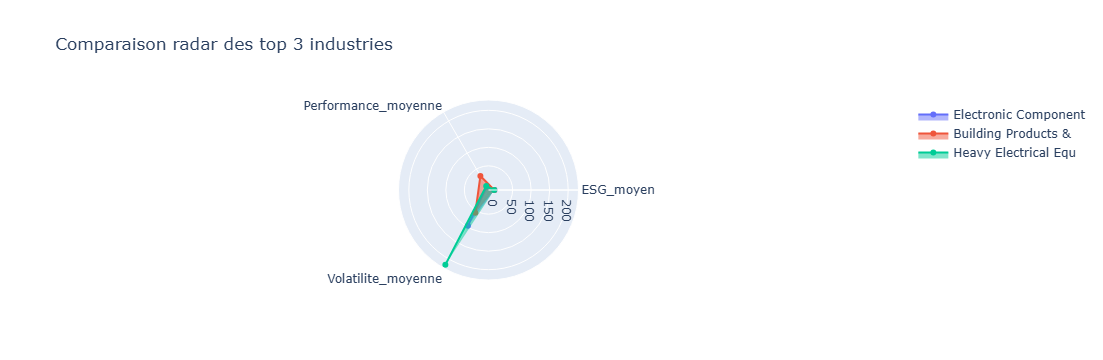

In [179]:
if 'gicSubindustry' in data.columns:
    # Création d'un tableau de bord sectoriel
    sector_metrics = []
    
    for industry in data['gicSubindustry'].unique():
        industry_data = data[data['gicSubindustry'] == industry]
        
        metrics = {
            'Industrie': industry,
            'Nombre_entreprises': len(industry_data),
            'ESG_moyen': industry_data['Company_ESG_pulse'].mean() if 'Company_ESG_pulse' in data.columns else None,
            'ESG_median': industry_data['Company_ESG_pulse'].median() if 'Company_ESG_pulse' in data.columns else None,
            'Performance_moyenne': industry_data['52w_change price percent'].mean() if '52w_change price percent' in data.columns else None,
            'Volatilite_moyenne': industry_data['Price_volatility'].mean() if 'Price_volatility' in data.columns else None,
            'Market_Cap_moyenne': industry_data['Market Cap'].mean() if 'Market Cap' in data.columns else None
        }
        sector_metrics.append(metrics)
    
    sector_df = pd.DataFrame(sector_metrics)
    sector_df = sector_df.sort_values('ESG_moyen', ascending=False, na_position='last')
    
    print("Tableau de bord sectoriel:")
    print(sector_df)
    
    # Visualisation radar pour comparaison sectorielle
    if len(sector_df) >= 2:
        # Sélection des top 3 industries
        top_industries = sector_df.head(3)
        
        categories = ['ESG_moyen', 'Performance_moyenne', 'Volatilite_moyenne']
        available_categories = [cat for cat in categories if top_industries[cat].notna().any()]
        
        if len(available_categories) >= 2:
            fig = go.Figure()
            
            for idx, row in top_industries.iterrows():
                values = [row[cat] if pd.notna(row[cat]) else 0 for cat in available_categories]
                
                fig.add_trace(go.Scatterpolar(
                    r=values,
                    theta=available_categories,
                    fill='toself',
                    name=row['Industrie'][:20]  # Tronquer le nom si trop long
                ))
            
            fig.update_layout(
                polar=dict(
                    radialaxis=dict(
                        visible=True,
                    )),
                showlegend=True,
                title="Comparaison radar des top 3 industries"
            )
            
            fig.show()


In [181]:
print("RÉSUMÉ DE L'ANALYSE:")
print("1. Dataset analysé avec", len(data), "entreprises")
print("2. Secteurs représentés:", data['gicSector'].nunique() if 'gicSector' in data.columns else "N/A")
print("3. Sous-industries:", data['gicSubindustry'].nunique() if 'gicSubindustry' in data.columns else "N/A")
print("4. Pays représentés:", data['Country'].nunique() if 'Country' in data.columns else "N/A")

RÉSUMÉ DE L'ANALYSE:
1. Dataset analysé avec 705 entreprises
2. Secteurs représentés: 1
3. Sous-industries: 31
4. Pays représentés: 15


In [189]:
print("\nPRINCIPALES OBSERVATIONS:")

# Observation sur les corrélations ESG-Finance
if 'Company_ESG_pulse' in data.columns and 'Market Cap' in data.columns:
    esg_finance_corr = data[['Company_ESG_pulse', 'Market Cap']].corr().iloc[0,1]
    if pd.notna(esg_finance_corr):
        if abs(esg_finance_corr) > 0.3:
            print(f"- Corrélation {'forte' if abs(esg_finance_corr) > 0.5 else 'modérée'} entre ESG et capitalisation boursière ({esg_finance_corr:.3f})")
        else:
            print(f"- Corrélation faible entre ESG et capitalisation boursière ({esg_finance_corr:.3f})")

# Observation sur la diversité géographique
if 'Country' in data.columns:
    us_companies = (data['Country'] == 'United States').sum()
    total_companies = len(data)
    us_percentage = (us_companies / total_companies) * 100
    print(f"{us_percentage:.1f}% des entreprises sont américaines")



PRINCIPALES OBSERVATIONS:
29.4% des entreprises sont américaines


In [191]:
results_summary = {
    'total_companies': len(data),
    'missing_data_summary': missing_df.head(10).to_dict(),
    'sector_summary': sector_df.to_dict() if 'sector_df' in locals() else None,
    'correlation_esg_finance': esg_finance_corr if 'esg_finance_corr' in locals() else None
}

print("Résultats sauvegardés dans la variable 'results_summary'")
print("Fin de l'analyse complète du dataset ESG")

Résultats sauvegardés dans la variable 'results_summary'
Fin de l'analyse complète du dataset ESG


In [195]:
#results_summary